This code was initially developed for the Boston Housing dataset, which is no longer available. 
However, the California dataset was utilized as an alternative, yielding results that are less conclusive but sufficient for the purposes of GradiantBoost implementation

In [18]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading the California Housing dataset from SKLearn
california=fetch_california_housing()

# Creating a DataFrame 'X' to store the feature values (data) of the California dataset
X = pd.DataFrame(california.data, columns = california.feature_names)

# Creating a DataFrame 'y' to store the target values (housing prices) of the California dataset
y=pd.DataFrame(california.target)

In [7]:
# Extracting the first 5 rows of the 'X' DataFrame
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
# Extracting the first 10 rows of the 'y' DataFrame
y[0:10]

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
5,2.697
6,2.992
7,2.414
8,2.267
9,2.611


In [9]:
# Splitting the data into training and testing sets
# X: Features (data)
# y: Target variable
# test_size=0.2: 20% of the data will be used for testing, and 80% for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Creating a Gradient Boosting Regressor model with specified parameters
# max_depth=2: Maximum depth of the individual trees in the ensemble is set to 2.
# n_estimators=3: The number of boosting stages (trees) to be run is set to 3.
# learning_rate=1: The step size at each iteration while moving toward a minimum of the loss function is set to 1.

# Training the model with the training set
model = GradientBoostingRegressor(max_depth = 2, n_estimators=3, learning_rate=1).fit(X_train, y_train)

In [11]:
# Making predictions on the test set using the trained Gradient Boosting Regressor model
y_pred = model.predict(X_test)

In [12]:
# Calculating the R-squared score to evaluate the performance of the model
r2_score(y_pred, y_test)

0.2911656593593447

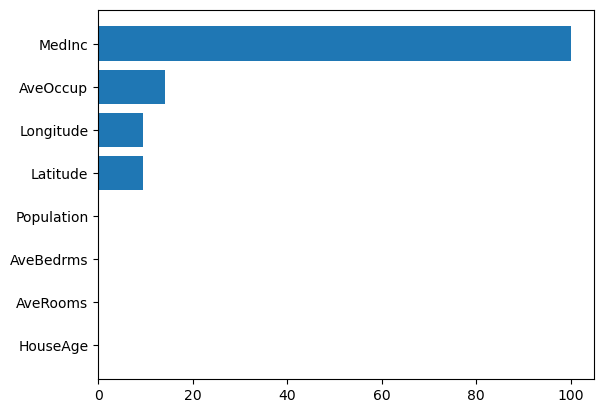

In [16]:
# Extracting feature importances from the trained Gradient Boosting Regressor model
feature_importance = model.feature_importances_

# Normalizing feature importances to be in the range [0, 100]
feature_importance = 100.0*(feature_importance/feature_importance.max())

# Sorting features based on their importance
sorted_idx = np.argsort(feature_importance)

# Creating positions for the horizontal bar chart
pos= np.arange(sorted_idx.shape[0])+.5

# Convert california.feature_names to a NumPy array
feature_names_array = np.array(california.feature_names)

# Plotting a horizontal bar chart to visualize feature importances
plt.barh(pos, feature_importance[sorted_idx], align='center')

# Setting y-axis ticks with feature names based on the sorted order
plt.yticks(pos, feature_names_array[sorted_idx]);

In [19]:
# Define a dictionary of hyperparameters for the GridSearchCV
LR = {'learning_rate': [0.15, 0.1, 0.10,0.05], 'n_estimators':[100,150,200,250]}

# Create a GridSearchCV object for hyperparameter tuning
# estimator=GradientBoostingRegressor(): The base model is GradientBoostingRegressor.
# param_grid=LR: The hyperparameter grid to search over, which includes learning_rate and n_estimators.
# scoring='r2': The scoring metric used for evaluating the models is R-squared.
tuning= GridSearchCV(estimator = GradientBoostingRegressor(), 
                    param_grid = LR, scoring='r2')


# Fit the GridSearchCV object on the training data
tuning.fit(X_train, y_train)

# Retrieve the best hyperparameters and the corresponding best R-squared score
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.15, 'n_estimators': 250}, 0.8186502379782258)